<font color=blue>
Supriya Raman & Dharvi Kumra <br>
11th November, 2019
    </font>

# <font color=navy>Lending Club Case Study</font>
***

## <font color=brown>I. Prerequisite </font>
#### <font color=orange><u> Description: </u> The pre-conditions of the project - To be verfied/checked before code execution</font>
[](http://)
1. Change the path of the 'loan.csv' input file before running this code.

2. Please make sure that you have following python libraries imported/installed at your system:

    * numpy version	 : 1.12.1 or higher
    * pandas version : 0.20.3 or higher
    * seaborn version: 0.8.0 or higher

## <font color=brown> II. Import Libraries </font>
#### <font color=orange><u> Description: </u>Python inbuilt libraries to be imported to support code execution</font>

In [24]:
# Import python libraries 
import pandas as pd
print('pandas version\t:',pd.__version__)

import numpy as np
print('numpy version\t:',np.__version__)

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,8

import seaborn as sns
print('seaborn version\t:',sns.__version__)

# suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

pandas version	: 0.24.2
numpy version	: 1.16.4
seaborn version	: 0.9.0


## <font color=brown> III. Data Understanding </font>
#### <font color=orange><u> Description: </u>Fetching the data from loans.csv input file and then understanding the data features like shape, verifying data sample, checking attribute datatypes, finding the missing values etc. </font>

In [25]:
#Read the data from csv file 
df_loan = pd.read_csv("/Users/vikaskumra/Desktop/AI/StatisticsEssentials/loan.csv",low_memory=False)

#Checking the shape of the datset
df_loan.shape

(39717, 111)

In [26]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [28]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [29]:
# summing up the missing values (column-wise)
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### <font color=green> <u> Inference  : </u> <br> 1. Input data has 39717 observations <br> 2. Input data has 111 attributes. <br> 3. Data has several attributes which has missing data in all observations. These attributes can be dropped. 
</font>

## <font color=brown> IV. Data Cleaning </font>
#### <font color=orange> <u> Description: </u> Data need to be cleaned either by dropping the rows/columns which are insignificant for further analysis OR by imputing data using appropriate method in missing fields 
</font>

In [30]:
# Many columns above are found to have all missing values
# Delete all columns which have missing values in all observations (no data in column)
df_loan = df_loan.dropna(axis=1,how='all')
df_loan.shape

(39717, 57)

#### <font color=green> <u> Inference  : </u> After deleting all columns which have missing values in all observations, only 57 attributes are left
</font>

In [31]:
## Drop Duplicate rows if any
df_loan.drop_duplicates(keep="first")
df_loan.shape

(39717, 57)

#### <font color=green> <u> Inference  : </u> No duplicate row is found in the data
</font>

In [32]:
# summing up the missing values (column-wise)
round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [33]:
# Column 'next_pymnt_d' and 'mths_since_last_record' - found to have more than 90% missing values above
# These columns are deleted
df_loan = df_loan.drop('next_pymnt_d', axis=1)
df_loan = df_loan.drop('mths_since_last_record', axis=1)
df_loan.shape

(39717, 55)

In [34]:
# Interest Rate field has values with percent sign. The symbol is removed for field data analysis
df_loan["int_rate"] = df_loan["int_rate"].str.replace("%","")
#convert values of int_rate to float percentage
df_loan["int_rate"] = pd.to_numeric(df_loan["int_rate"])

#### <font color=green> <u> Inference  : </u>  After analysing the percentage of missing values in remaining 57 columns, its found that two column has more than 90% missing value and hence its dropped. This left us with 55 attributes for further analysis

## <font color=brown> V. Data Analysis </font>
#### <font color=orange> <u> Description: </u> Analyze data observations and remaining attributes to find out suitable attributes which can be predicators of default </font>

In [35]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [36]:
# Find columns where number of unique value is only 1
unique = df_loan.nunique()
unique = unique[unique.values == 1]
unique

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [37]:
# Above attributes are found to have only one data value in all observations.
# Not found eligible for further analysis and hence dropped
df_loan = df_loan.drop('pymnt_plan', axis=1)
df_loan = df_loan.drop('initial_list_status', axis=1)
df_loan = df_loan.drop('collections_12_mths_ex_med', axis=1)
df_loan = df_loan.drop('policy_code', axis=1)
df_loan = df_loan.drop('application_type', axis=1)
df_loan = df_loan.drop('acc_now_delinq', axis=1)
df_loan = df_loan.drop('chargeoff_within_12_mths', axis=1)
df_loan = df_loan.drop('delinq_amnt', axis=1)
df_loan = df_loan.drop('tax_liens', axis=1)

df_loan.shape

(39717, 46)

#### <font color=green> <u> Inference  : </u>  Nine attributes were found to have same data values for all the observations in the file. These attributes were found insignificant for further analysis and hence its dropped. There are remaining 46 attributes for further analysis

In [38]:
# Below fields where found to be attributes related to loan applicant (personal information) -
# Not found eligible for further analysis and dropped
df_loan = df_loan.drop('zip_code', axis=1)
df_loan = df_loan.drop('url', axis=1)
df_loan = df_loan.drop('member_id', axis=1)
df_loan = df_loan.drop('title', axis=1)
df_loan = df_loan.drop('emp_title', axis=1)

df_loan.shape

(39717, 41)

In [39]:
# Below fields where found to be cutomer behaviour attributes post loan approval -
# Not found eligible for further analysis and dropped
df_loan = df_loan.drop('delinq_2yrs', axis=1)
df_loan = df_loan.drop('earliest_cr_line', axis=1)
df_loan = df_loan.drop('inq_last_6mths', axis=1)
df_loan = df_loan.drop('mths_since_last_delinq', axis=1)
df_loan = df_loan.drop('revol_bal', axis=1)
df_loan = df_loan.drop('revol_util', axis=1)
df_loan = df_loan.drop('out_prncp', axis=1)
df_loan = df_loan.drop('out_prncp_inv', axis=1)
df_loan = df_loan.drop('total_pymnt', axis=1)
df_loan = df_loan.drop('total_pymnt_inv', axis=1)
df_loan = df_loan.drop('total_rec_prncp', axis=1)
df_loan = df_loan.drop('total_rec_int', axis=1)
df_loan = df_loan.drop('total_rec_late_fee', axis=1)
df_loan = df_loan.drop('recoveries', axis=1)
df_loan = df_loan.drop('collection_recovery_fee', axis=1)
df_loan = df_loan.drop('last_pymnt_d', axis=1)
df_loan = df_loan.drop('last_pymnt_amnt', axis=1)
df_loan = df_loan.drop('last_credit_pull_d', axis=1)
#these fields don't add value to data analysis hence discarded
df_loan = df_loan.drop('pub_rec', axis=1)
df_loan = df_loan.drop('desc', axis=1)
df_loan = df_loan.drop('verification_status', axis=1)
df_loan = df_loan.drop('total_acc', axis=1)
df_loan = df_loan.drop('open_acc', axis=1)
df_loan = df_loan.drop('issue_d', axis=1) #beacuse this will not predict anything for future loans
df_loan.shape


(39717, 17)

In [40]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
id                      39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null float64
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
loan_status             39717 non-null object
purpose                 39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
pub_rec_bankruptcies    39020 non-null float64
dtypes: float64(6), int64(3), object(8)
memory usage: 5.2+ MB


#### <font color=green> <u> Inference  : </u> <br> By referring the metadata of the input file in Data Dictionary, it was found to have three types of attributes as below - <br> 1. Applicant related attributes like age, occupation etc. <br> 2. Loan related attributes <br> 3. Cuctomer Behaviour related attributes which was observed post loan approval. <br> Only loan related attribute was found to be suitable for further analysis and hence all other attributes were dropped. This left us with only 17 attributes for further analysis

In [41]:
#Loan status field
df_loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [42]:
df_loan = df_loan[df_loan.loan_status != "Current"]
df_loan.shape

(38577, 17)

In [43]:
#Change Fully Paid to 0 and Charged Off to 1 for simplicity
df_loan["loan_status"] = df_loan["loan_status"].map({"Fully Paid":0,"Charged Off":1})
df_loan["loan_status"].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

#### <font color=green> <u> Inference  : </u> Loan status field <u> "loan_status" </u> is found to have three types of loan as below <br> 1. Fully Paid <br> 2. Charged Off <br> 3. Current <br> <br> "Current" loans were not found applicable for further analysis of Loan Defaults and hence those observations are dropped. <br> "Fully Paid" and "Charged Off" loans are hot encoded with 0 and 1 respectively for the ease of further analysis.

In [44]:
df_loan.shape

(38577, 17)

In [45]:
df_loan.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,38577,NaN,NaN,NaN,676379,209264,54734,512033,656423,829146,1.0775e+06
loan_amnt,38577,NaN,NaN,NaN,11047,7348.44,500,5300,9600,15000,35000
funded_amnt,38577,NaN,NaN,NaN,10784.1,7090.31,500,5200,9550,15000,35000
funded_amnt_inv,38577,NaN,NaN,NaN,10222.5,7022.72,0,5000,8733.44,14000,35000
term,38577,2,36 months,29096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,38577,NaN,NaN,NaN,11.9322,3.69133,5.42,8.94,11.71,14.38,24.4
installment,38577,NaN,NaN,NaN,322.466,208.639,15.69,165.74,277.86,425.55,1305.19
grade,38577,7,B,11675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,38577,35,A4,2873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,37544,11,10+ years,8488,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color=brown> V. Univariate Analysis </font>
#### <font color=orange> <u> Description: </u> Analyze remaining 18 attributes individually to understand data further. Treating missing data to fill up missing values. Since the objective is to find out what factors lead to Defaults, we consider target variable  = "loan_status"

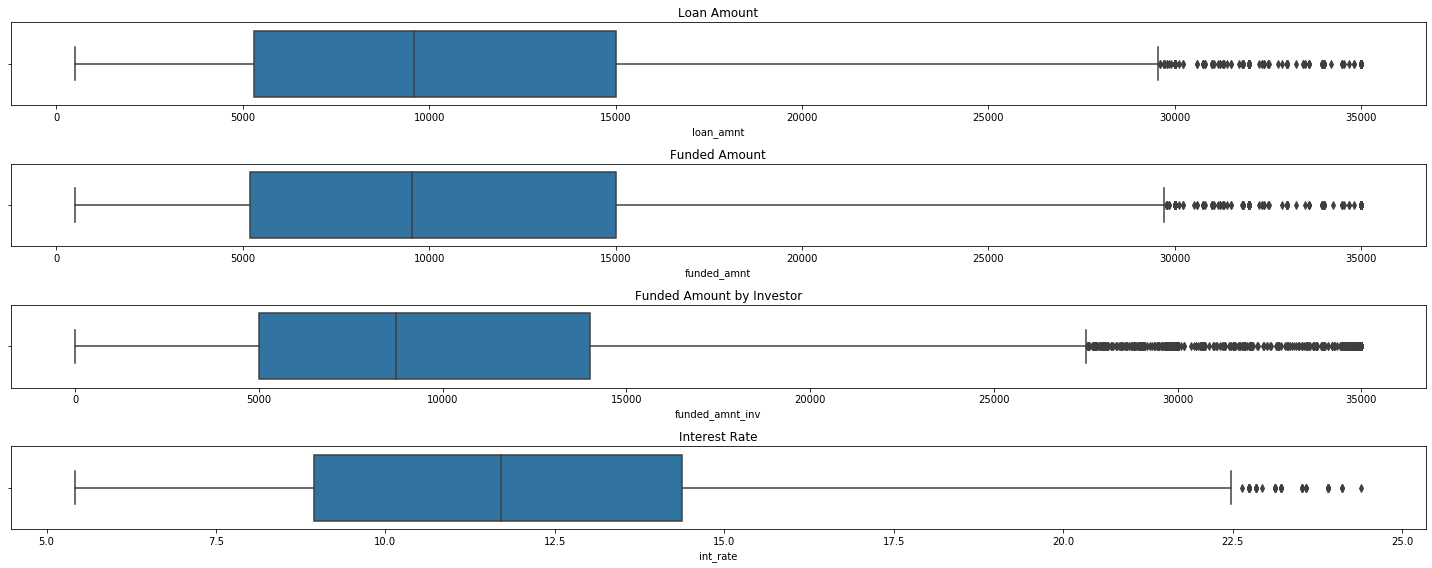

In [46]:
# Analyzing Amount fields "loan_amnt", "funded_amnt", "funded_amnt_inv" and "int_rate"
# Boxplot graphs
plt.subplot(4,1,1)
plt.title('Loan Amount')
sns.boxplot(x=df_loan["loan_amnt"])


plt.subplot(4,1,2)
plt.title('Funded Amount')
sns.boxplot(x=df_loan["funded_amnt"])

plt.subplot(4,1,3)
plt.title('Funded Amount by Investor')
sns.boxplot(x=df_loan["funded_amnt_inv"])


plt.subplot(4,1,4)
plt.title('Interest Rate')
sns.boxplot(x=df_loan["int_rate"])
plt.tight_layout()
plt.show()


In [47]:
# All three amount fields are found to have outliers, hence fields imputed with their Median value
df_loan["loan_amnt"] = df_loan["loan_amnt"].fillna((df_loan['loan_amnt'].median()))
df_loan["funded_amnt"] = df_loan["funded_amnt"].fillna((df_loan['funded_amnt'].median()))
df_loan["funded_amnt_inv"] = df_loan["funded_amnt_inv"].fillna((df_loan['funded_amnt_inv'].median()))

# Interest rate doesn't have more outliers, hence fields imputed with their Mean value
df_loan["int_rate"] = df_loan["int_rate"].fillna((df_loan['int_rate'].mean()))

In [48]:
df_loan["int_rate"] = pd.to_numeric(df_loan["int_rate"])
highest_int_rate = df_loan["int_rate"].max()
lowest_int_rate = df_loan["int_rate"].min()
print("highest_int_rate: ",highest_int_rate)
print("lowest_int_rate: ",lowest_int_rate)

highest_int_rate:  24.4
lowest_int_rate:  5.42


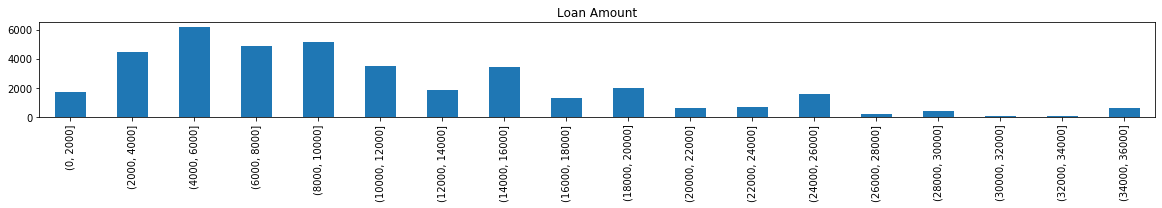

In [49]:
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000]
loan_amnt = pd.cut(df_loan["loan_amnt"], bins=bins)
plt.subplot(4,1,1)
plt.title('Loan Amount')
loan_amnt.value_counts().sort_index().plot.bar()
plt.show()

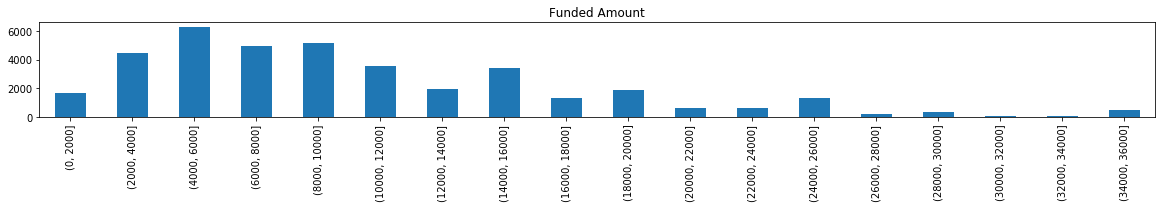

In [50]:
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000]
funded_amnt = pd.cut(df_loan["funded_amnt"], bins=bins)
plt.subplot(4,1,1)
plt.title('Funded Amount')
funded_amnt.value_counts().sort_index().plot.bar()
plt.show()

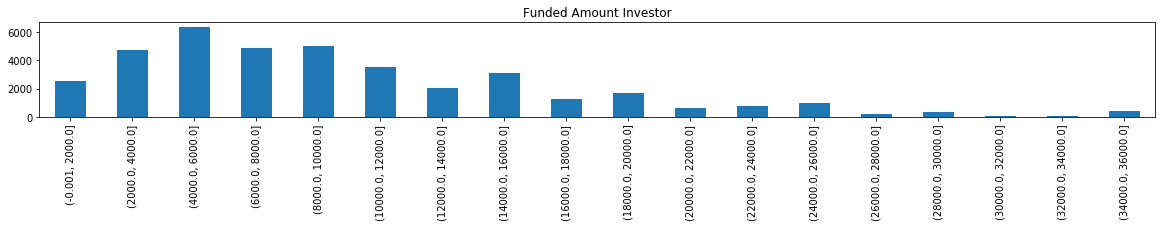

In [51]:
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000]
funded_amnt_inv = pd.cut(df_loan["funded_amnt_inv"], bins=bins,include_lowest=True)
plt.subplot(4,1,1)
plt.title('Funded Amount Investor')
funded_amnt_inv.value_counts().sort_index().plot.bar()
plt.show()

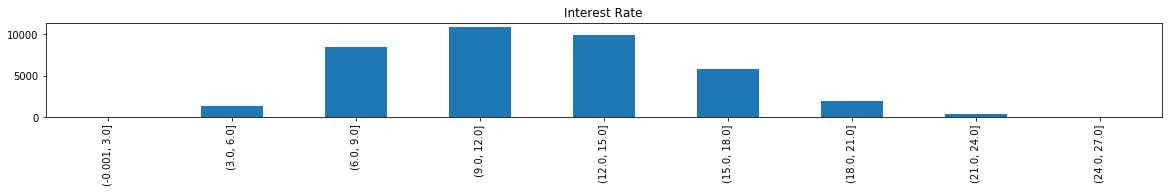

In [52]:
bins = [0,3,6,9,12,15,18,21,24,27]
Interest_rate = pd.cut(df_loan["int_rate"], bins=bins,include_lowest=True)
plt.subplot(4,1,1)
plt.title('Interest Rate')
Interest_rate.value_counts().sort_index().plot.bar()
plt.show()

#### <font color=green> <u> Inference  : </u> <br> 1. Amount fields "loan_amnt", "funded_amt" and "funded_amt_inv" are found to having missing values. The attributes have outliers as the values are not evenly distributed. The missing values are thus imputed using field Median and they are found to have same values from bar plots that is most of the people were given exact amount as they demanded <br> 2. Interest Rate fields "int_rate" is found to having missing values. The attributes have less outliers as the values are almost evenly distributed. The missing values are thus imputed using field Mean <br> 3. Loan interest rate field int_rate is analysed and found to have highest interest rate as 24.59% and lowest interest rate is found as 5.42%
</font>

In [53]:
# Loan term field "term"
df_loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [54]:
# Loan term field has values suffixed with word "months". The suffix is removed for field data analysis
df_loan["term"] = df_loan["term"].str.replace("months","")
df_loan["term"] = pd.to_numeric(df_loan["term"])

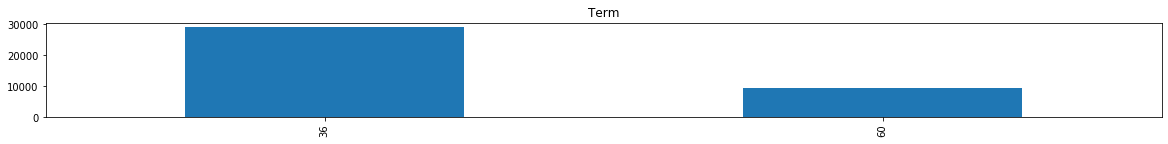

In [55]:
plt.subplot(4,1,1)
plt.title('Term')
df_loan["term"].value_counts().sort_index().plot.bar()
plt.show()

Inference : usually of the loans are for 36 months term

In [56]:
# Emp_length 
df_loan["emp_length"] = df_loan["emp_length"].str.extract('(\d+)')
df_loan["emp_length"] = pd.to_numeric(df_loan["emp_length"])
df_loan["emp_length"] = df_loan["emp_length"].fillna((df_loan['emp_length'].mean()))
df_loan["emp_length"] = df_loan["emp_length"].astype(int)

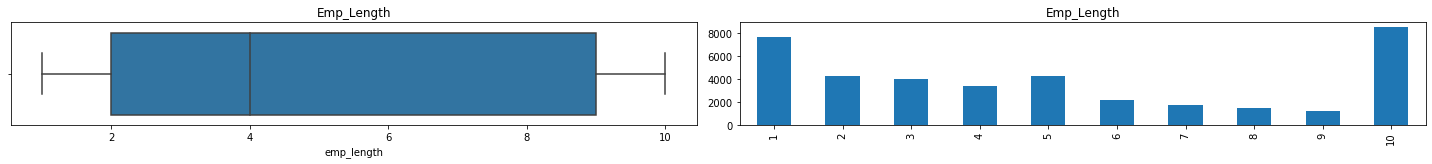

In [57]:
plt.subplot(4,2,1)
plt.title('Emp_Length')
sns.boxplot(x=df_loan["emp_length"])
plt.subplot(4,2,2)
plt.title('Emp_Length')
df_loan['emp_length'].value_counts().sort_index().plot.bar()
plt.tight_layout()
plt.show()

Inference : We see that emp_length has no outliers and highest emp_length is 10 years

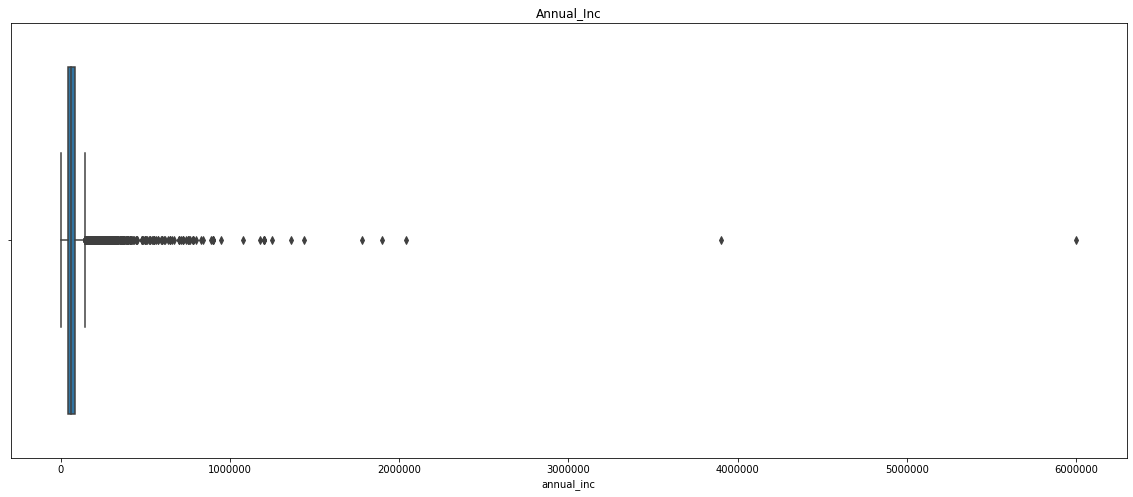

In [63]:
# Annual Income
plt.title('Annual_Inc')
sns.boxplot(x=df_loan["annual_inc"])
plt.show()

In [64]:
# Above graph shows annual income field has lots of outliers - hence fields is imputed with their Median value
df_loan["annual_inc"] = df_loan["annual_inc"].fillna((df_loan['annual_inc'].median()))

In [65]:
# Graph for Annual Income field
print(df_loan["annual_inc"].max())
print(df_loan["annual_inc"].min())

6000000.0
4000.0


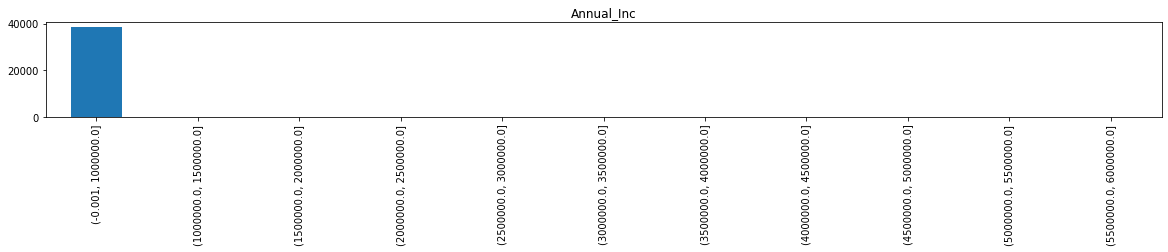

In [66]:
#annual_inc
bins = [0,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,5500000,6000000]
Annual_Inc = pd.cut(df_loan["annual_inc"], bins=bins,include_lowest=True)
plt.subplot(4,1,2)
plt.title('Annual_Inc')
Annual_Inc.value_counts().sort_index().plot.bar()
plt.show()

As there are alot of people who lie in 0-1000000 range annual income we plot the range

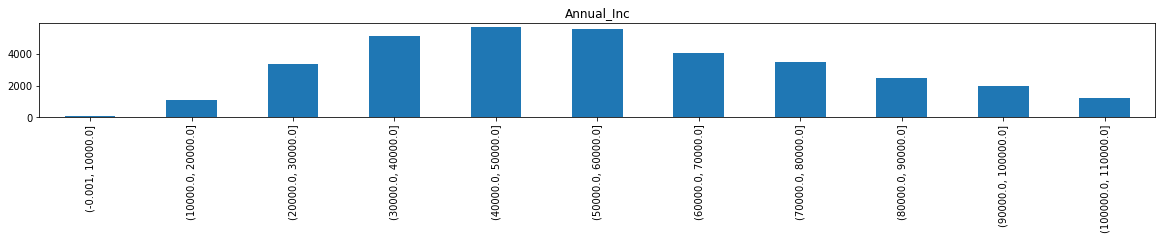

In [67]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000]
Annual_Inc = pd.cut(df_loan["annual_inc"], bins=bins,include_lowest=True)
plt.subplot(4,1,1)
plt.title('Annual_Inc')
Annual_Inc.value_counts().sort_index().plot.bar()
plt.show()

Inference : In the above plot we see that most people have annual_inc in range 40000 usd to 50000 usd

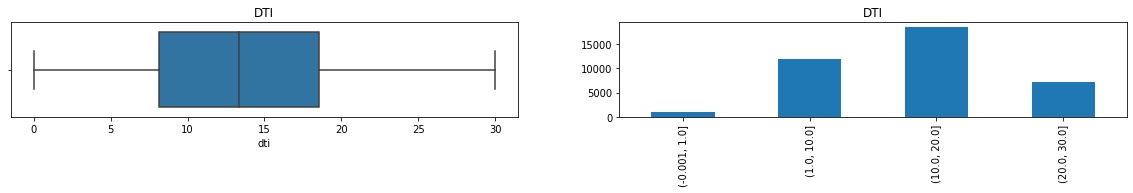

In [68]:
# dti field
plt.subplot(4,2,1)
plt.title('DTI')
sns.boxplot(df_loan["dti"])
plt.subplot(4,2,2)
bins = [0,1,10,20,30]
dti = pd.cut(df_loan["dti"],bins,include_lowest = True)
plt.title('DTI')
dti.value_counts().sort_index().plot.bar()
plt.show()

In [69]:
# Above graph shows that "dti" field is evenly distributed and there is no outlier
# MIssing values are imputed using mean
df_loan["dti"] = df_loan["dti"].fillna((df_loan['dti'].mean()))

#### <font color=green> <u> Inference  : </u> Field "dti" is ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. The value in this field is found to have uniformly distrributed values and thus missing values are imputed using the mean

## <font color=brown> V. Bivariate Analysis </font>

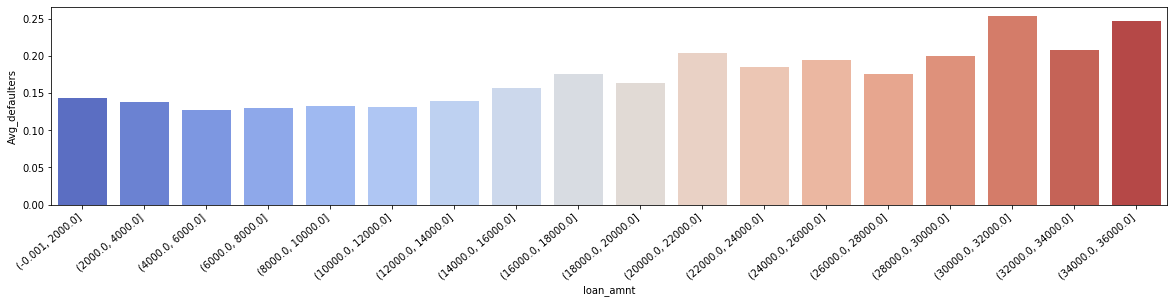

In [74]:
#loan_amnt
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000]
plt.subplot(2,1,1)
loan_amnt_dict = df_loan.groupby(pd.cut(df_loan["loan_amnt"], bins, include_lowest = True))["loan_status"].agg("mean").to_dict()
loan_amnt_df = pd.DataFrame(list(loan_amnt_dict.items()), columns=['loan_amnt', 'Avg_defaulters'])
loan_amnt_df
ax = sns.barplot(x="loan_amnt",y = 'Avg_defaulters',data=loan_amnt_df ,palette="coolwarm") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

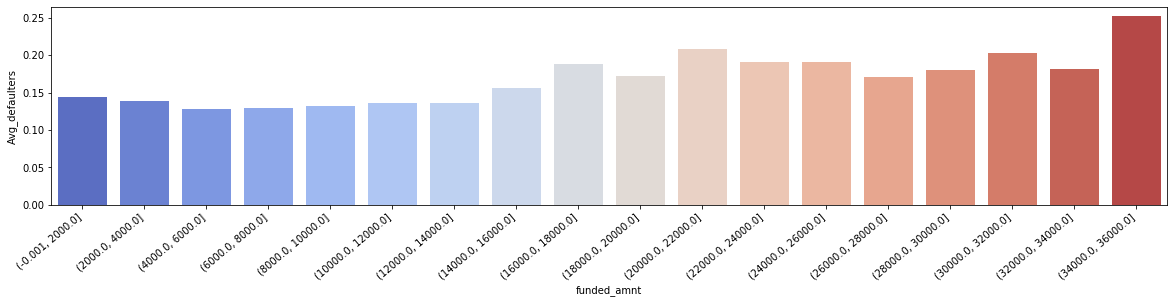

In [76]:
#funded_amnt_inv
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000]
plt.subplot(2,1,1)
funded_amnt_dict = df_loan.groupby(pd.cut(df_loan["funded_amnt"], bins, include_lowest = True))["loan_status"].agg("mean").to_dict()
funded_amnt_df = pd.DataFrame(list(funded_amnt_dict.items()), columns=['funded_amnt', 'Avg_defaulters'])
funded_amnt_df
ax = sns.barplot(x="funded_amnt",y = 'Avg_defaulters',data=funded_amnt_df ,palette="coolwarm") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

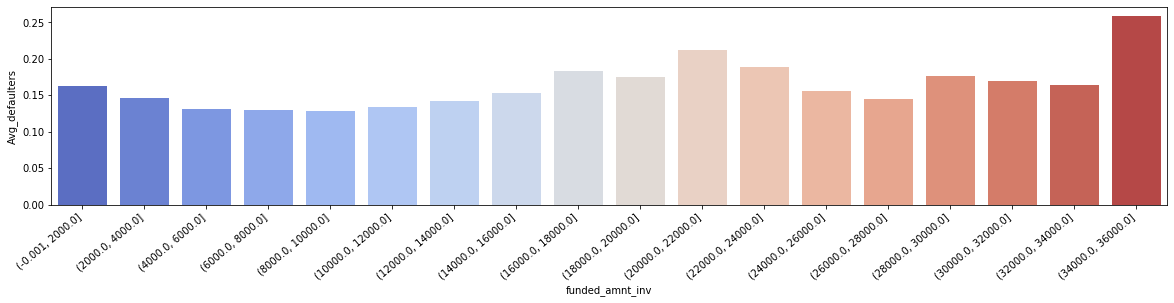

In [72]:
#funded_amnt_inv
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000]
plt.subplot(2,1,1)
funded_amnt_inv_dict = df_loan.groupby(pd.cut(df_loan["funded_amnt_inv"], bins, include_lowest = True))["loan_status"].agg("mean").to_dict()
funded_amnt_inv_df = pd.DataFrame(list(funded_amnt_inv_dict.items()), columns=['funded_amnt_inv', 'Avg_defaulters'])
funded_amnt_inv_df
ax = sns.barplot(x="funded_amnt_inv",y = 'Avg_defaulters',data=funded_amnt_inv_df ,palette="coolwarm") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### <font color=green> <u> Inference  : </u> We see from above three plots that people who ask for loans in range 34000 usd to 36000 usd are more risky cause default 

In [82]:
#create bins for int_rates
bins = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
avg_defaulters_per_int_rate_bin_dict = df_loan.groupby(pd.cut(df_loan["int_rate"], bins))["loan_status"].agg(["mean"]).to_dict()
avg_defaulters_per_int_rate_bin_df = pd.DataFrame(list(avg_defaulters_per_int_rate_bin_dict["mean"].items()), columns=['Interest Rate Interval', 'Default Avg'])
avg_defaulters_per_int_rate_bin_df

,Interest Rate Interval,Default Avg
0,"(5, 6]",0.040862
1,"(6, 7]",0.048198
2,"(7, 8]",0.060413
3,"(8, 9]",0.091195
4,"(9, 10]",0.097687
5,"(10, 11]",0.113273
6,"(11, 12]",0.141111
7,"(12, 13]",0.157327
8,"(13, 14]",0.162927
9,"(14, 15]",0.179256


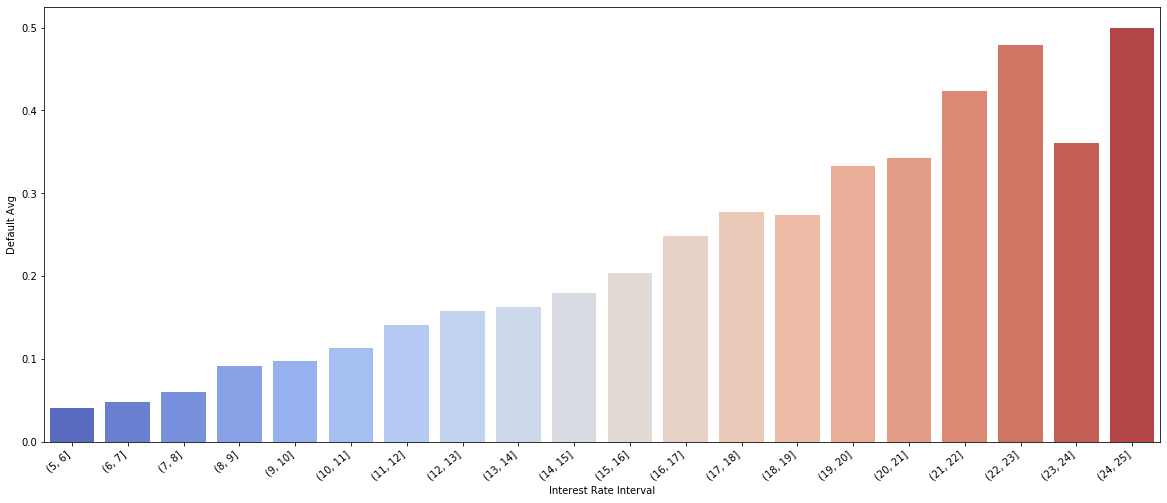

In [84]:
ax = sns.barplot(x="Interest Rate Interval",y = 'Default Avg',data=avg_defaulters_per_int_rate_bin_df ,palette="coolwarm") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Inference : As the rate of interest increases the avg. default increases

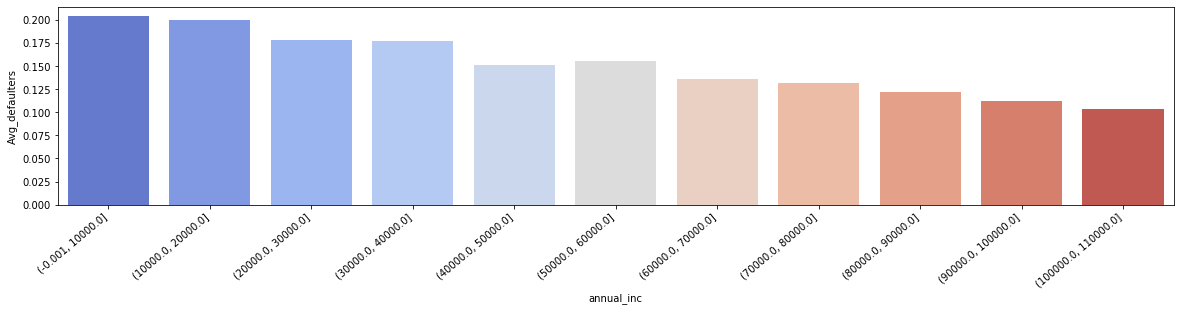

In [79]:
## Annual Income
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000]
plt.subplot(2,1,1)
annual_inc_dict = df_loan.groupby(pd.cut(df_loan["annual_inc"], bins, include_lowest = True))["loan_status"].agg("mean").to_dict()
annual_inc_df = pd.DataFrame(list(annual_inc_dict.items()), columns=['annual_inc', 'Avg_defaulters'])
annual_inc_df
ax = sns.barplot(x="annual_inc",y = 'Avg_defaulters',data=annual_inc_df ,palette="coolwarm") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### <font color=green> <u> Inference  : </u> Those with annual income very low as in range upto 10,000 usd are risky people and can cause more defaults

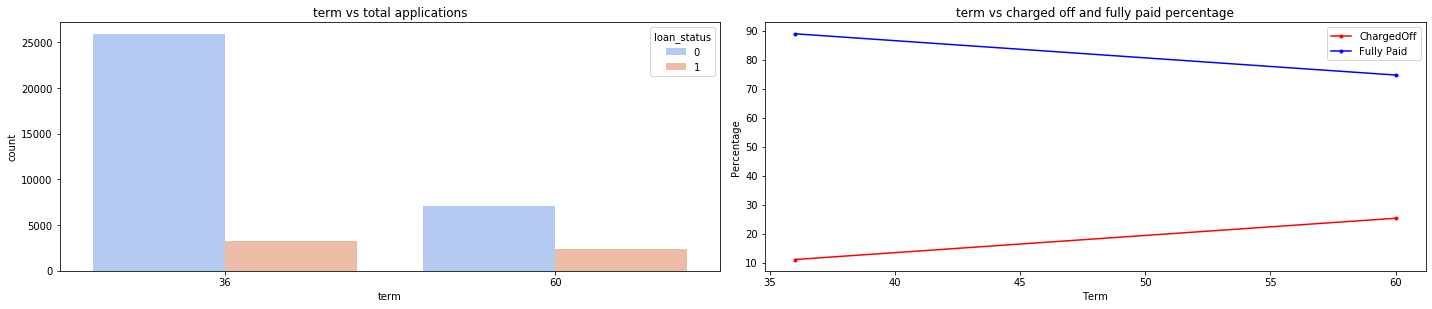

In [44]:
#Term analysis
plt.subplot(2,2,1)
plt.title("term vs total applications")
plt.xlabel("Term")
plt.ylabel("total applications")
sns.countplot(x="term",data=df_loan,hue="loan_status", palette="coolwarm")
plt.subplot(2,2,2)
plt.title("term vs charged off and fully paid percentage")
one_dict = df_loan.query("loan_status == 1").groupby(["term"])["loan_status"].agg("count").to_dict()
ones_dataf = pd.DataFrame(list(one_dict.items()), columns=['term', 'total_ones'])
zero_dict = df_loan.query("loan_status == 0").groupby(["term"])["loan_status"].agg("count").to_dict()
zeroes_dataf = pd.DataFrame(list(zero_dict.items()), columns=['term', 'total_zeroes'])
collective_df_one_zero = ones_dataf.merge(zeroes_dataf)
collective_df_one_zero["percentage_default"]= (collective_df_one_zero["total_ones"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
collective_df_one_zero["percentage_fullypaid"]= (collective_df_one_zero["total_zeroes"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
plt.plot(collective_df_one_zero["term"], collective_df_one_zero["percentage_default"],"r.-",label="ChargedOff")
plt.plot(collective_df_one_zero["term"], collective_df_one_zero["percentage_fullypaid"],"b.-",label="Fully Paid")
plt.xlabel("Term")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()
plt.show()

#### <font color=green> <u> Inference  : </u> Most of the application has Loan Term as 36 months but higher probability of default is in term of 60

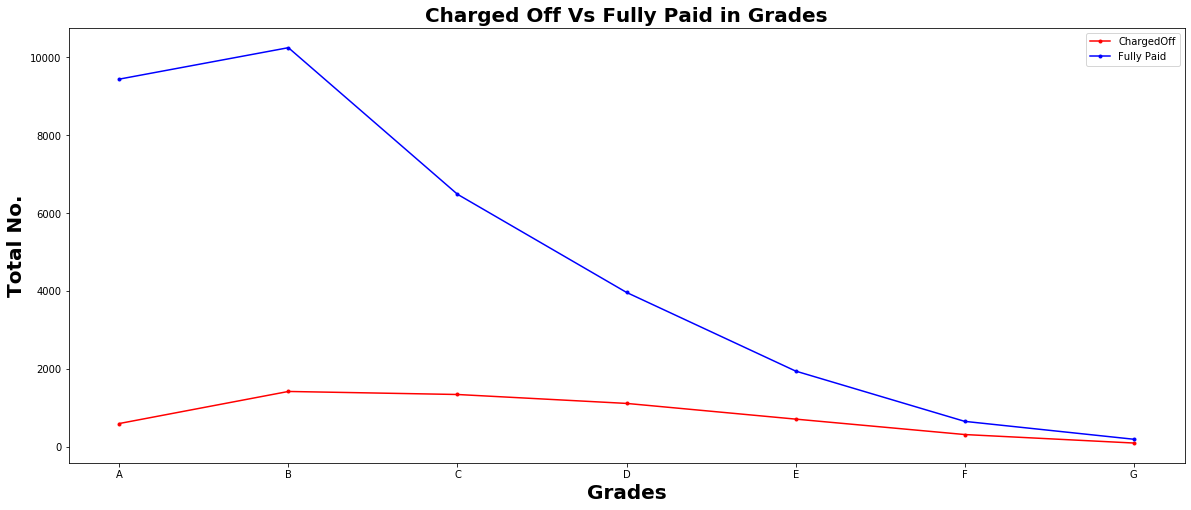

In [86]:
one_df_dict = df_loan.query("loan_status == 1").groupby(["grade"])["loan_status"].agg("count").to_dict()
ones_df = pd.DataFrame(list(one_df_dict.items()), columns=['Grades', 'total_ones'])
zero_df_dict = df_loan.query("loan_status == 0").groupby(["grade"])["loan_status"].agg("count").to_dict()
zeroes_df = pd.DataFrame(list(zero_df_dict.items()), columns=['Grades', 'total_zeroes'])
collective_df = ones_df.merge(zeroes_df)
plt.plot(collective_df["Grades"], collective_df["total_ones"],"r.-",label="ChargedOff")
plt.plot(collective_df["Grades"], collective_df["total_zeroes"],"b.-",label="Fully Paid")
plt.title('Charged Off Vs Fully Paid in Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel('Total No.',fontdict={"fontweight":"bold","fontsize":"20"})
plt.xlabel('Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.legend(prop={'size': 10})
plt.show()

Inference : From the above graph we see that there large no. of people in category A and B

In [88]:
collective_df["percentage_default"]= (collective_df["total_ones"]/(collective_df["total_ones"]+collective_df["total_zeroes"]))*100
collective_df["percentage_fullypaid"]= (collective_df["total_zeroes"]/(collective_df["total_ones"]+collective_df["total_zeroes"]))*100
collective_df

,Grades,total_ones,total_zeroes,percentage_default,percentage_fullypaid
0,A,602,9443,5.993031,94.006969
1,B,1425,10250,12.205567,87.794433
2,C,1347,6487,17.194281,82.805719
3,D,1118,3967,21.986234,78.013766
4,E,715,1948,26.849418,73.150582
5,F,319,657,32.684426,67.315574
6,G,101,198,33.779264,66.220736


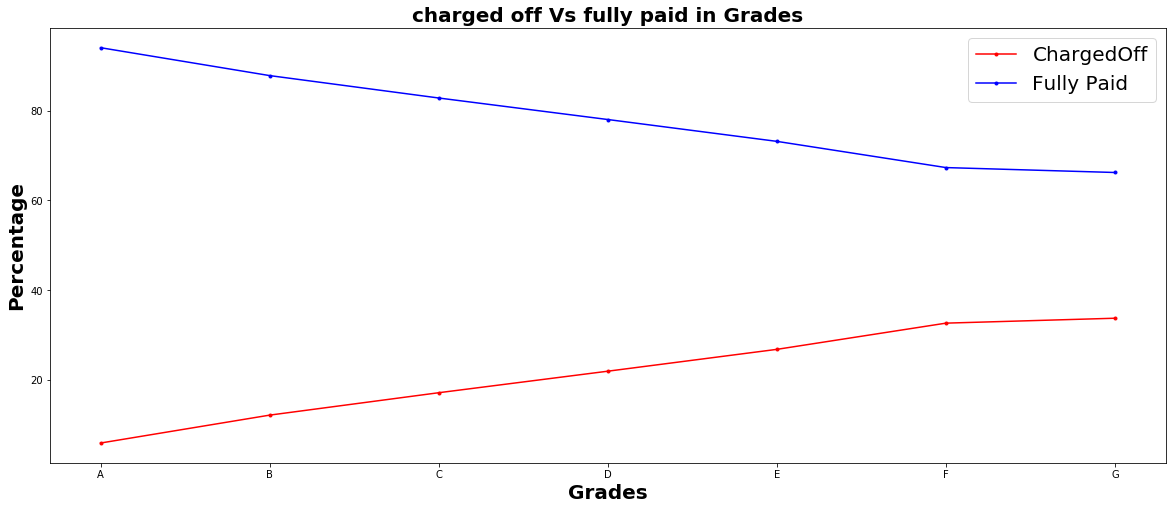

In [91]:
# Grade
plt.plot(collective_df["Grades"], collective_df["percentage_default"],"r.-",label="ChargedOff")
plt.plot(collective_df["Grades"], collective_df["percentage_fullypaid"],"b.-",label="Fully Paid")
plt.title('charged off Vs fully paid in Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel('Percentage',fontdict={"fontweight":"bold","fontsize":"20"})
plt.xlabel('Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.legend(prop={'size': 20})
plt.show()

Inference : In the above graph we see lower the Grade higher the risk of person being defaulter. People with grade G are more risky

In [48]:
#Sub Grades
one_dict = df_loan.query("loan_status == 1").groupby(["sub_grade"])["loan_status"].agg("count").to_dict()
ones_dataf = pd.DataFrame(list(one_dict.items()), columns=['SubGrades', 'total_ones'])
zero_dict = df_loan.query("loan_status == 0").groupby(["sub_grade"])["loan_status"].agg("count").to_dict()
zeroes_dataf = pd.DataFrame(list(zero_dict.items()), columns=['SubGrades', 'total_zeroes'])
collective_df_one_zero = ones_dataf.merge(zeroes_dataf)
collective_df_one_zero["percentage_default"]= (collective_df_one_zero["total_ones"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
collective_df_one_zero["percentage_fullypaid"]= (collective_df_one_zero["total_zeroes"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
collective_df_one_zero

,SubGrades,total_ones,total_zeroes,percentage_default,percentage_fullypaid
0,A1,30,1109,2.633889,97.366111
1,A2,74,1434,4.907162,95.092838
2,A3,103,1707,5.690608,94.309392
3,A4,178,2695,6.195614,93.804386
4,A5,217,2498,7.992634,92.007366
5,B1,171,1626,9.515860,90.484140
6,B2,228,1773,11.394303,88.605697
7,B3,341,2484,12.070796,87.929204
8,B4,329,2108,13.500205,86.499795
9,B5,356,2259,13.613767,86.386233


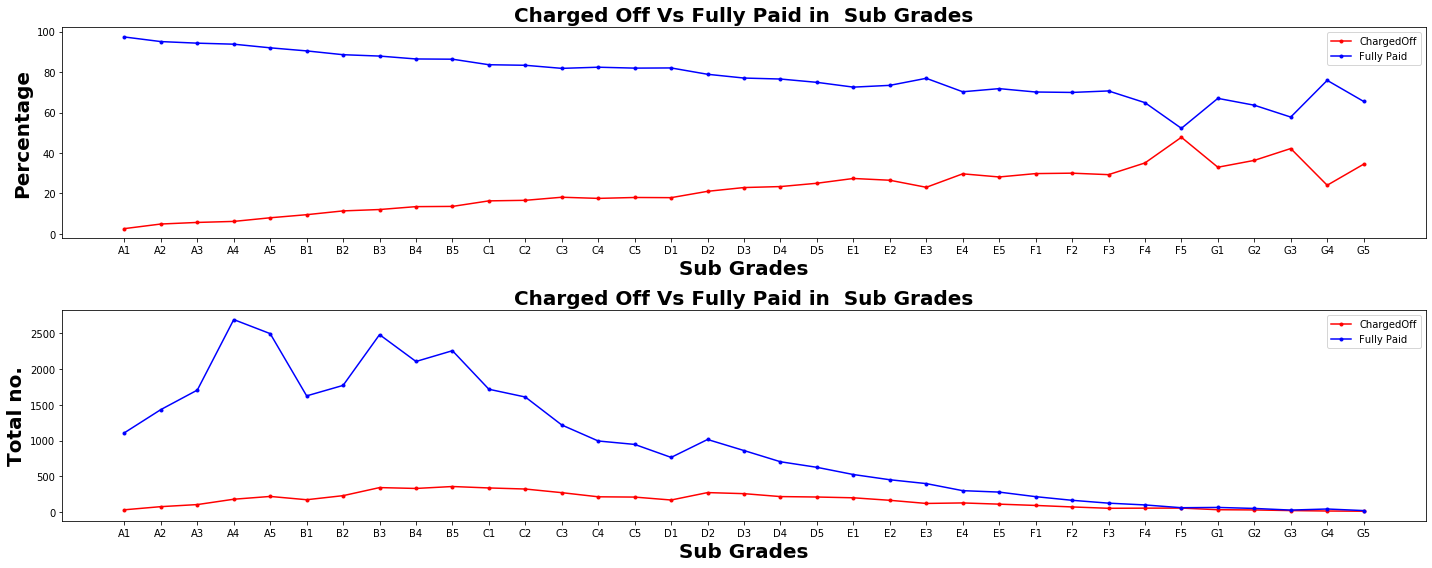

In [49]:
#Sub Grades
plt.subplot(2,1,1)
plt.plot(collective_df_one_zero["SubGrades"], collective_df_one_zero["percentage_default"],"r.-",label="ChargedOff")
plt.plot(collective_df_one_zero["SubGrades"], collective_df_one_zero["percentage_fullypaid"],"b.-",label="Fully Paid")
plt.title('Charged Off Vs Fully Paid in  Sub Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel('Percentage',fontdict={"fontweight":"bold","fontsize":"20"})
plt.xlabel('Sub Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.legend(prop={'size': 10})
plt.subplot(2,1,2)
plt.plot(collective_df_one_zero["SubGrades"], collective_df_one_zero["total_ones"],"r.-",label="ChargedOff")
plt.plot(collective_df_one_zero["SubGrades"], collective_df_one_zero["total_zeroes"],"b.-",label="Fully Paid")
plt.title('Charged Off Vs Fully Paid in  Sub Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel('Total no.',fontdict={"fontweight":"bold","fontsize":"20"})
plt.xlabel('Sub Grades',fontdict={"fontweight":"bold","fontsize":"20"})
plt.legend(prop={'size': 10})
plt.tight_layout()
plt.show()

#### <font color=green> <u> Inference  : </u> In the above plotted how many loans were bad loans by the type of Sub grade received in the credit score of the customer. The lower the grade of the credit score, the higher the risk for investors. <br> Form first graph we infer that people with subgrade A1 to B5 are more in no. <br>
#### <font color=green>From second graph we infer that people with subgrade F5 to G5 are more risky and cause more defaults</font>

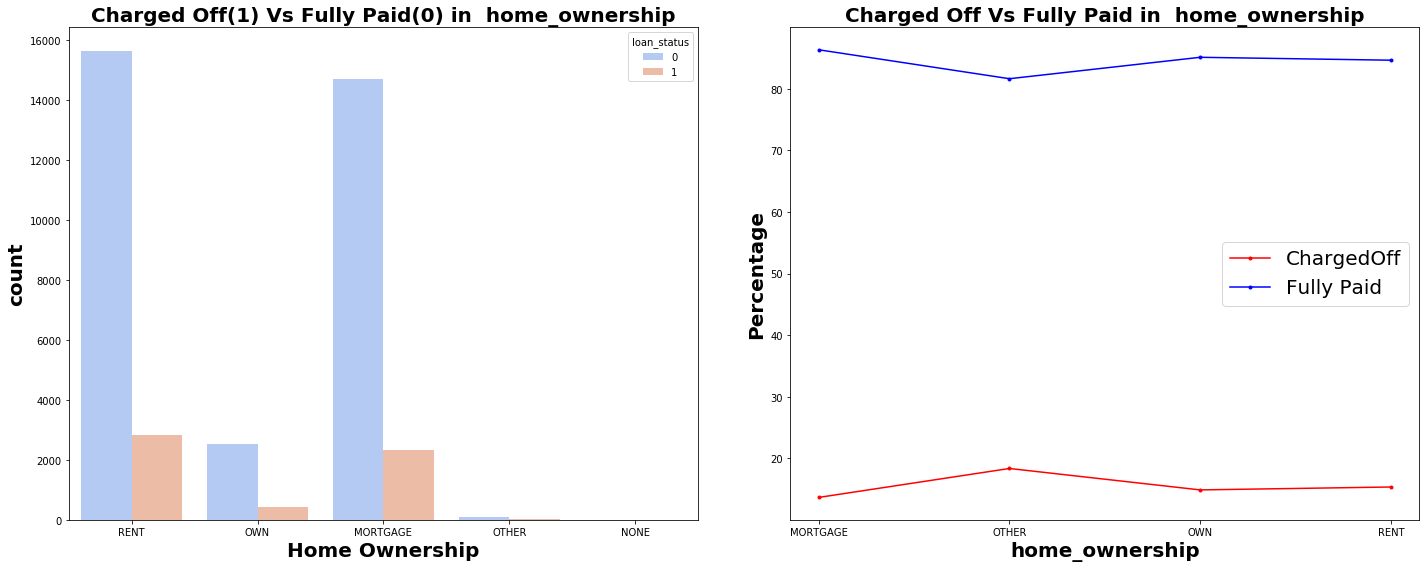

In [95]:
# Home_Ownership field
plt.subplot(1,2,1)
plt.title('Charged Off(1) Vs Fully Paid(0) in  home_ownership',fontdict={"fontweight":"bold","fontsize":"20"})
sns.countplot(x="home_ownership",data=df_loan,hue="loan_status", palette="coolwarm")
plt.xlabel("Home Ownership",fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel("count",fontdict={"fontweight":"bold","fontsize":"20"})
one_dict = df_loan.query("loan_status == 1").groupby(["home_ownership"])["loan_status"].agg("count").to_dict()
ones_dataf = pd.DataFrame(list(one_dict.items()), columns=['home_ownership', 'total_ones'])
zero_dict = df_loan.query("loan_status == 0").groupby(["home_ownership"])["loan_status"].agg("count").to_dict()
zeroes_dataf = pd.DataFrame(list(zero_dict.items()), columns=['home_ownership', 'total_zeroes'])
collective_df_one_zero = ones_dataf.merge(zeroes_dataf)
collective_df_one_zero["percentage_default"]= (collective_df_one_zero["total_ones"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
collective_df_one_zero["percentage_fullypaid"]= (collective_df_one_zero["total_zeroes"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
plt.subplot(1,2,2)
plt.plot(collective_df_one_zero["home_ownership"], collective_df_one_zero["percentage_default"],"r.-",label="ChargedOff")
plt.plot(collective_df_one_zero["home_ownership"], collective_df_one_zero["percentage_fullypaid"],"b.-",label="Fully Paid")
plt.title('Charged Off Vs Fully Paid in  home_ownership',fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel('Percentage',fontdict={"fontweight":"bold","fontsize":"20"})
plt.xlabel('home_ownership',fontdict={"fontweight":"bold","fontsize":"20"})
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show()

#### <font color=green> <u> Inference  : </u> The home ownership status provided by the borrower during registration. Above graph shows "RENT" and "MORTGAGE" are the home ownerships of people who apply for loan usually but the second graph shows highest risks are involved in ownership "OTHERS"

In [51]:
collective_df_one_zero

,home_ownership,total_ones,total_zeroes,percentage_default,percentage_fullypaid
0,MORTGAGE,2327,14694,13.671347,86.328653
1,OTHER,18,80,18.367347,81.632653
2,OWN,443,2532,14.890756,85.109244
3,RENT,2839,15641,15.362554,84.637446


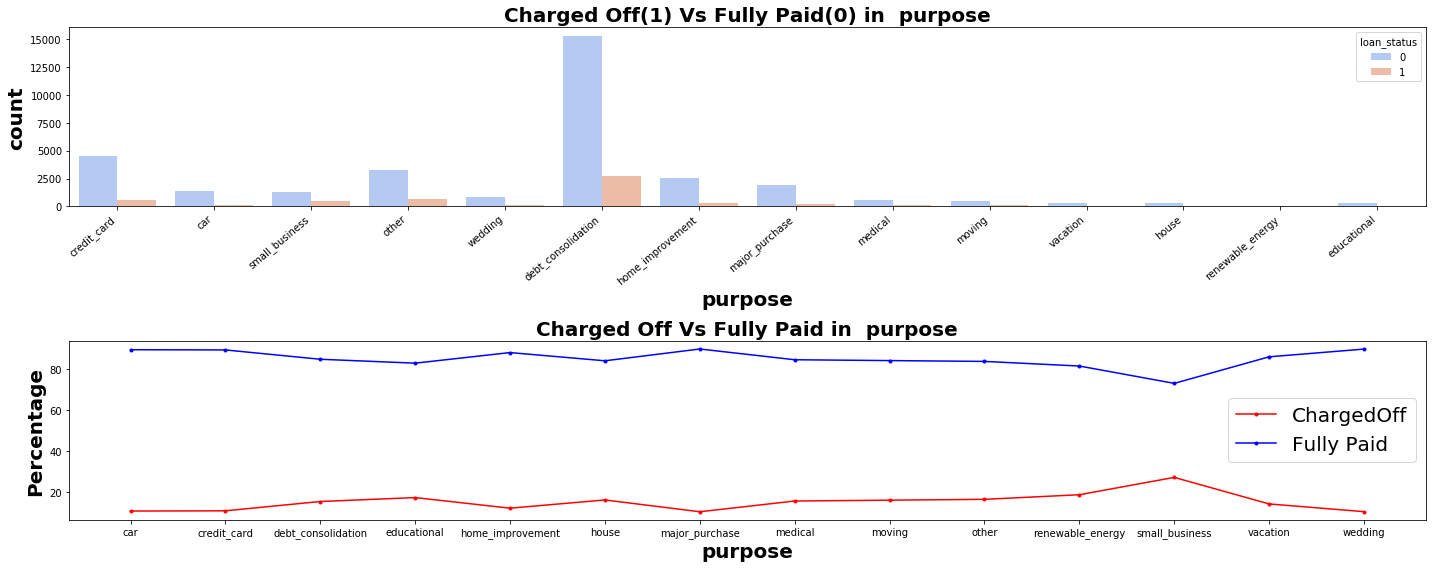

In [99]:
#Purpose field
plt.subplot(2,1,1)
plt.title('Charged Off(1) Vs Fully Paid(0) in  purpose',fontdict={"fontweight":"bold","fontsize":"20"})
ax = sns.countplot(x="purpose",data=df_loan,hue="loan_status", palette="coolwarm")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("purpose",fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel("count",fontdict={"fontweight":"bold","fontsize":"20"})
one_dict = df_loan.query("loan_status == 1").groupby(["purpose"])["loan_status"].agg("count").to_dict()
ones_dataf = pd.DataFrame(list(one_dict.items()), columns=['purpose', 'total_ones'])
zero_dict = df_loan.query("loan_status == 0").groupby(["purpose"])["loan_status"].agg("count").to_dict()
zeroes_dataf = pd.DataFrame(list(zero_dict.items()), columns=['purpose', 'total_zeroes'])
collective_df_one_zero = ones_dataf.merge(zeroes_dataf)
collective_df_one_zero["percentage_default"]= (collective_df_one_zero["total_ones"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
collective_df_one_zero["percentage_fullypaid"]= (collective_df_one_zero["total_zeroes"]/(collective_df_one_zero["total_ones"]+collective_df_one_zero["total_zeroes"]))*100
plt.subplot(2,1,2)
plt.plot(collective_df_one_zero["purpose"], collective_df_one_zero["percentage_default"],"r.-",label="ChargedOff")
plt.plot(collective_df_one_zero["purpose"], collective_df_one_zero["percentage_fullypaid"],"b.-",label="Fully Paid")
plt.title('Charged Off Vs Fully Paid in  purpose',fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel('Percentage',fontdict={"fontweight":"bold","fontsize":"20"})
plt.xlabel('purpose',fontdict={"fontweight":"bold","fontsize":"20"})
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show()

#### <font color=green> <u> Inference  : </u>  The Plot clearly shows that most of the loan applications have "debt_consolidation" as purpose but highest percentage of charged off are in "small business" hence small businesses are more risky

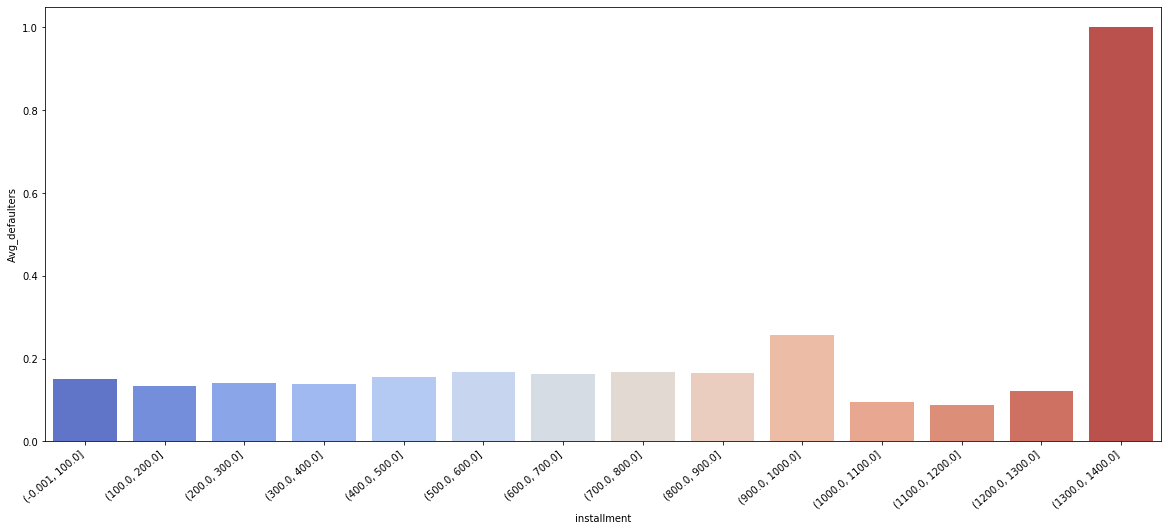

In [105]:
# Installment 
plt.subplot(1,1,1)
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400]
installment_dict = df_loan.groupby(pd.cut(df_loan["installment"], bins, include_lowest = True))["loan_status"].agg("mean").to_dict()
installment_df = pd.DataFrame(list(installment_dict.items()), columns=['installment', 'Avg_defaulters'])
installment_df
ax = sns.barplot(x="installment",y = 'Avg_defaulters',data=installment_df ,palette="coolwarm") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### <font color=green> <u> Inference  : As the installment amount increases the Probability of default also increases </u> 

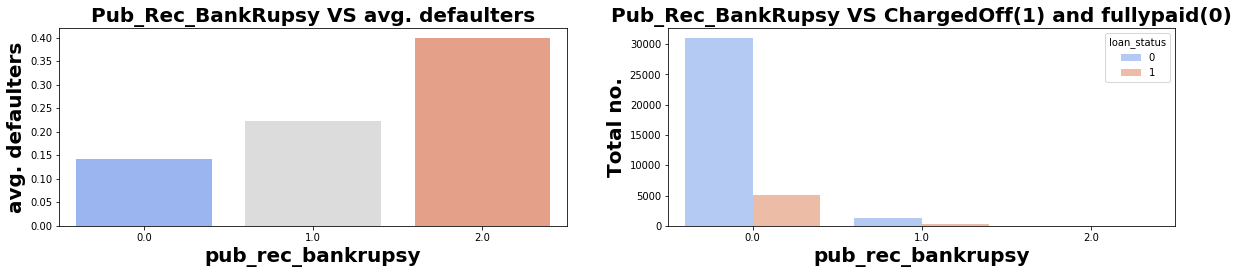

In [56]:
#BankRuptcies
plt.subplot(2,2,1)
plt.title("Pub_Rec_BankRupsy VS avg. defaulters",fontdict={"fontweight":"bold","fontsize":"20"})
avg_df_loan_defaulter_pub_rec_bank_dict = df_loan.groupby(["pub_rec_bankruptcies"])["loan_status"].agg("mean").to_dict()
avg_df_loan_defaulter_pub_rec_bank_df = pd.DataFrame(list(avg_df_loan_defaulter_pub_rec_bank_dict.items()), columns=['pub_rec_bankruptcies', 'Avg_defaulters'])
sns.barplot(x="pub_rec_bankruptcies",y="Avg_defaulters",data=
avg_df_loan_defaulter_pub_rec_bank_df,palette="coolwarm")
plt.xlabel("pub_rec_bankrupsy",fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel("avg. defaulters",fontdict={"fontweight":"bold","fontsize":"20"})
plt.subplot(2,2,2)
plt.title("Pub_Rec_BankRupsy VS ChargedOff(1) and fullypaid(0)",fontdict={"fontweight":"bold","fontsize":"20"})
sns.countplot(x="pub_rec_bankruptcies",data=df_loan,hue="loan_status", palette="coolwarm")
plt.xlabel("pub_rec_bankrupsy",fontdict={"fontweight":"bold","fontsize":"20"})
plt.ylabel("Total no.",fontdict={"fontweight":"bold","fontsize":"20"})
plt.show()

Inference : People with bankRupcy point 2 are observed to have more Avg_defaulters hence such people are usually not given loans


In [102]:
bins = [0,1,10,20,30]
total_df_loan_defaulter_dti_dict = df_loan.groupby(pd.cut(df_loan["dti"], bins,include_lowest = True))["loan_status"].agg("mean").to_dict()
total_df_loan_defaulter_dti_df = pd.DataFrame(list(total_df_loan_defaulter_dti_dict.items()), columns=['dti', 'avg_defaulters'])
total_df_loan_defaulter_dti_df

,dti,avg_defaulters
0,"(-0.001, 1.0]",0.117707
1,"(1.0, 10.0]",0.126777
2,"(10.0, 20.0]",0.151348
3,"(20.0, 30.0]",0.167338


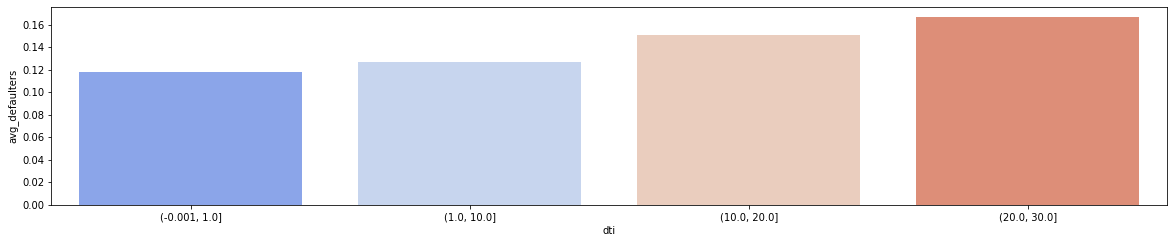

In [104]:
plt.subplot(2,1,1)
sns.barplot(x="dti",y="avg_defaulters",data=total_df_loan_defaulter_dti_df,palette="coolwarm")
plt.show()

Inference : In the above plot we see that highest perecent of default is for people with debt to income ratio (20.0,30.0] as dti rises default avg rises hence "dti" is a default driving factor

In [68]:
#addr_state
#since in loan_status 1 refers to charged off and 0 refers to full paid and we are trying to find out which state has highest probability of default hence if we take avg then it will be avg of charged off in that particular state
total_df_loan_defaulter_state_dict = df_loan.groupby(["addr_state"])["loan_status"].agg("mean").to_dict()
total_df_loan_defaulter_state_df = pd.DataFrame(list(total_df_loan_defaulter_state_dict.items()), columns=['states', 'total_defaulters'])
total_df_loan_defaulter_state_df

,states,total_defaulters
0,AK,0.192308
1,AL,0.124138
2,AR,0.114894
3,AZ,0.144876
4,CA,0.161894
5,CO,0.127937
6,CT,0.129477
7,DC,0.071090
8,DE,0.106195
9,FL,0.181230


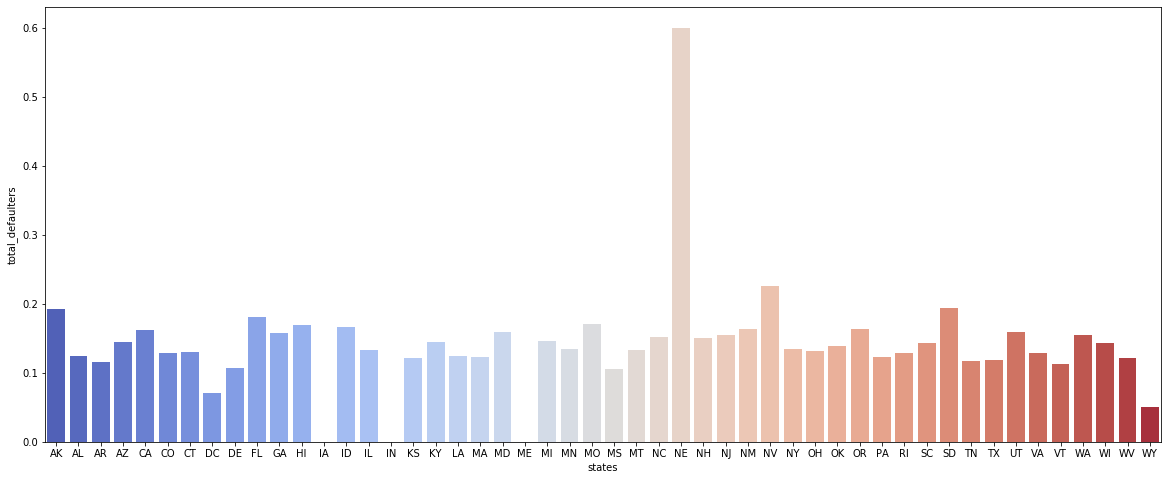

In [69]:
sns.barplot(x="states",y="total_defaulters",data=total_df_loan_defaulter_state_df,palette="coolwarm")

Inference : Highest no. of defaults occur  by people living in NE (Nebaraska)

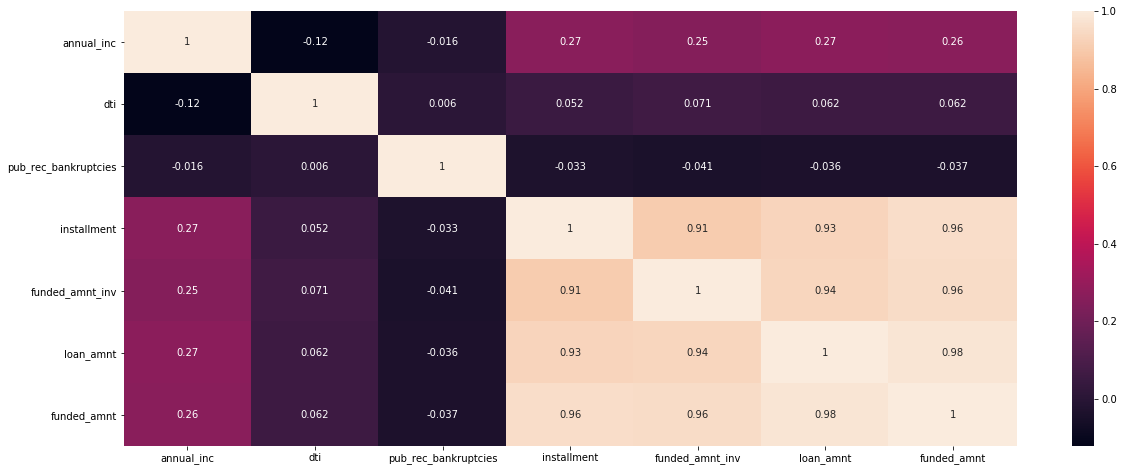

In [70]:
loan = df_loan[["annual_inc","dti","pub_rec_bankruptcies","installment","funded_amnt_inv","loan_amnt","funded_amnt"]]
cor =loan.corr()
round(cor,3)
sns.heatmap(cor,annot = True)

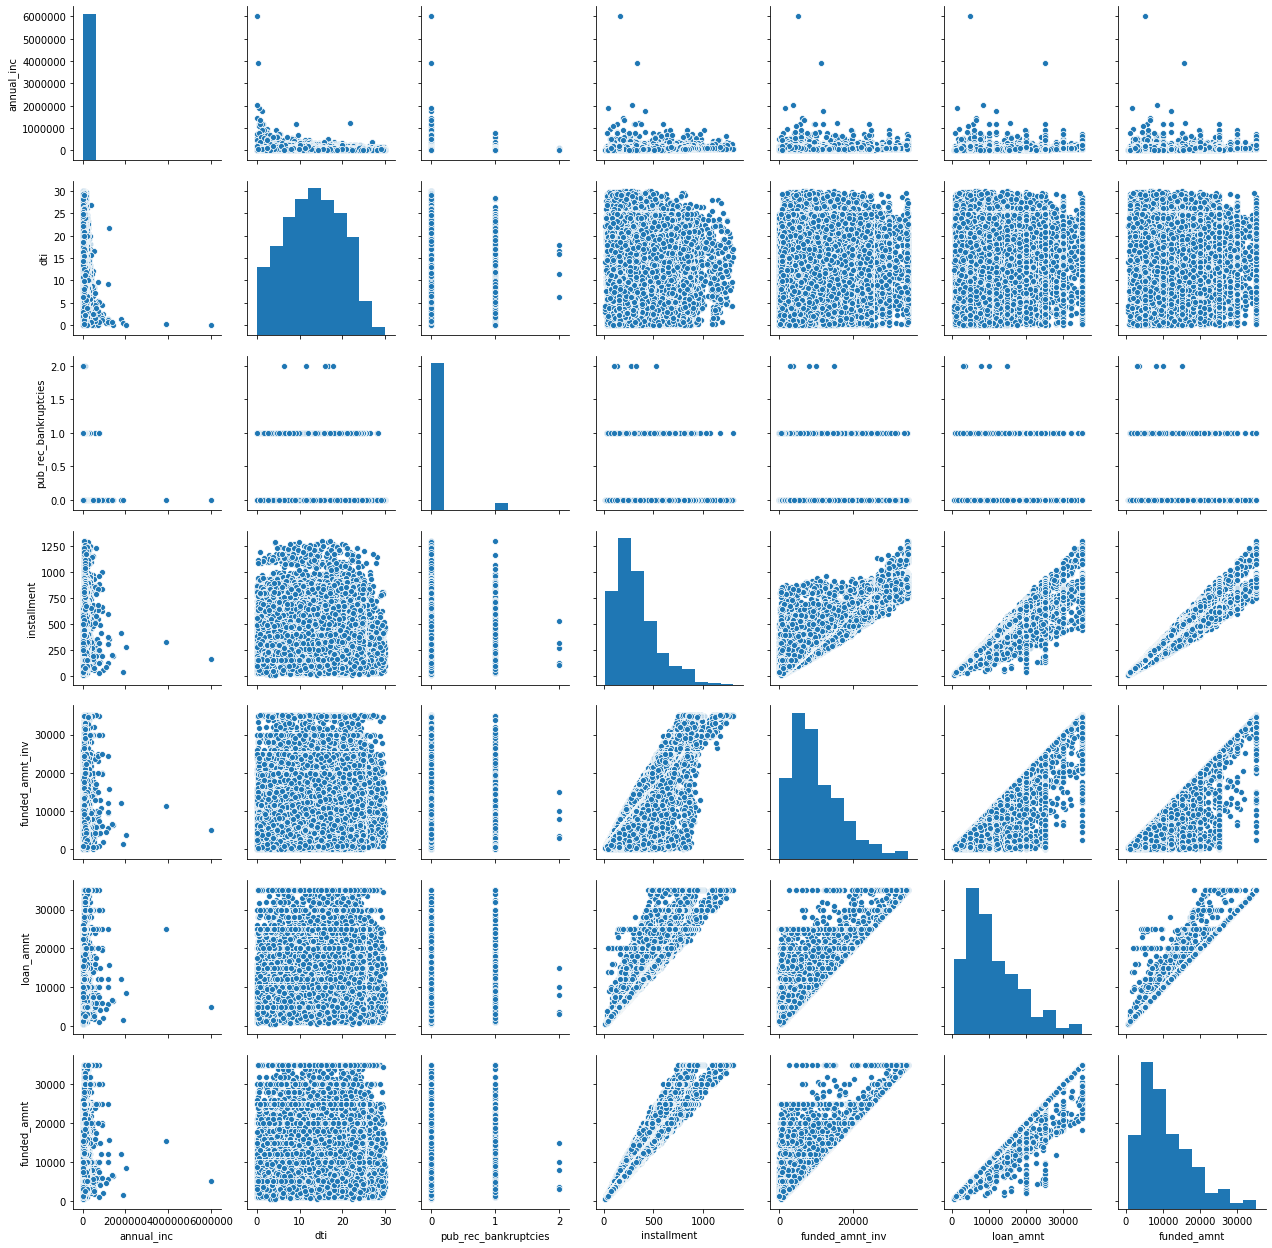

In [71]:
sns.pairplot(loan)

Inference: Correlation matrix was generated for all existing numerical attributes in the dataset to find how strongly the attributes are related. So, obtained correlation co-efficients are plotted in the heatmap and pairplot below. The heatmap and pairplot shows the following -

1. Loan Amount (loan_amnt) and the Funded Amount (funded_amnt) are highly co-related attributes where Correlation Co-efficient is 0.98

2. Other strongly co-related attributes are funded amount provided by investors (funded_amnt_inv)and instalment amount(The monthly payment owed by the borrower if the loan originates)

3. dti (debt to income ratio) is found strongly correlated to all the above attributes.